<a href="https://colab.research.google.com/github/Luciiferr420/concepts-of-AI/blob/main/A1Taufiq_wani_2438469.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assesment

Mounted at /content/drive
/content/drive/MyDrive/Assesment


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin1')

# Check available years
df['year'].unique()

# Filter for 2022
hdi_2022_df = df[df['year'] == 2022].copy()

In [5]:
# First 10 rows
hdi_2022_df.head(10)

# Shape
hdi_2022_df.shape

# Column names
hdi_2022_df.columns

# Data types
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [6]:
# Check missing values
hdi_2022_df.isnull().sum()

# Replace special characters
hdi_2022_df.replace("–", np.nan, inplace=True)

# Convert numeric columns
numeric_columns = [
    'hdi',
    'life expectancy',
    'gross inc percap',
    'gender development'
]

for col in numeric_columns:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)

# Drop rows with missing HDI
hdi_2022_df.dropna(subset=['hdi'], inplace=True)


In [7]:
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]

mean_hdi, median_hdi, std_hdi


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [8]:
print(hdi_2022_df.columns.tolist())


['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


In [9]:
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

top_10_gni = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
).head(10)

top_10_gni


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


In [10]:
region_mapping = {
    "Nepal": "South Asia",
    "India": "South Asia",
    "Pakistan": "South Asia",
    "Bangladesh": "South Asia",
    "Sri Lanka": "South Asia",
    "Bhutan": "South Asia",
    "Maldives": "South Asia",

    "United States": "North America",
    "Canada": "North America",

    "China": "East Asia",
    "Japan": "East Asia",
    "South Korea": "East Asia",

    "Germany": "Europe",
    "France": "Europe",
    "United Kingdom": "Europe",

    "Nigeria": "Africa",
    "Kenya": "Africa"
}


In [18]:
if 'region' not in df_2020_22.columns:
    df_2020_22['region'] = df_2020_22['country'].map(region_mapping)

In [19]:
df_2020_22['region'] = df_2020_22['region'].fillna("Other")


In [13]:
def classify_hdi(value):
    if value < 0.550:
        return "Low"
    elif value < 0.700:
        return "Medium"
    elif value < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# Save CSV
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


In [16]:
years = [2020, 2021, 2022]
df_2020_22 = df[df['year'].isin(years)].copy()

df_2020_22.to_csv("HDI_problem1B.csv", index=False)


In [20]:
df_2020_22.replace("–", np.nan, inplace=True)

df_2020_22.dropna(subset=['hdi', 'country', 'year'], inplace=True)

df_2020_22.drop_duplicates(inplace=True)


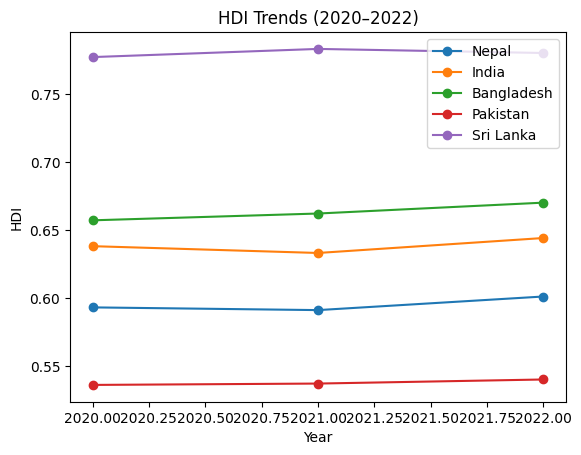

In [21]:
countries = ['Nepal', 'India', 'Bangladesh', 'Pakistan', 'Sri Lanka']

plt.figure()
for country in countries:
    temp = df_2020_22[df_2020_22['country'] == country]
    plt.plot(temp['year'], temp['hdi'], marker='o', label=country)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trends (2020–2022)")
plt.legend()
plt.show()


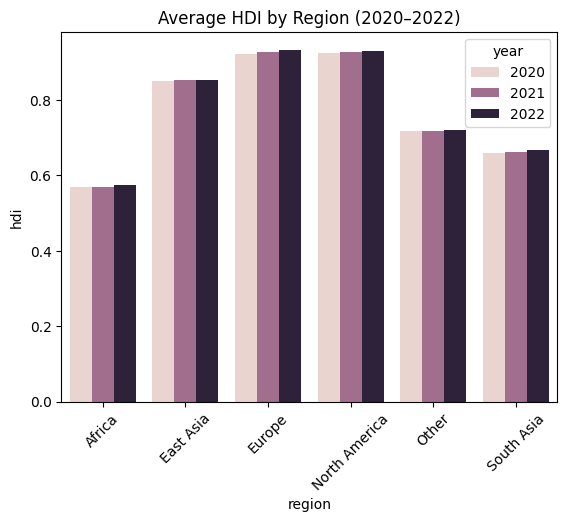

In [22]:
region_avg = (
    df_2020_22
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.show()


In [23]:
if 'region' not in df_2020_22.columns:
    df_2020_22['region'] = df_2020_22['country'].map(region_mapping)

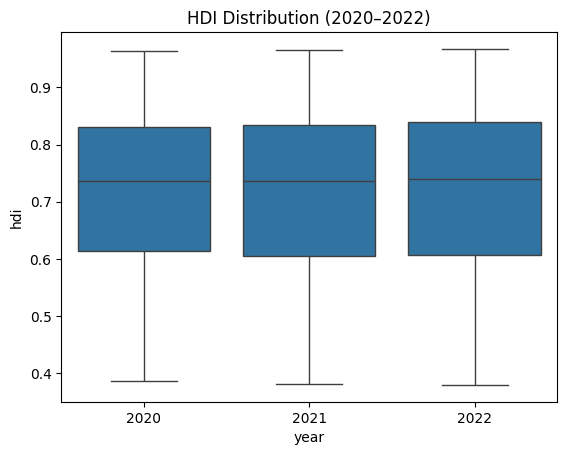

In [24]:
sns.boxplot(data=df_2020_22, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()


In [25]:
if 'gross inc percap' in df_2020_22.columns:
    sns.regplot(
        data=df_2020_22,
        x='gross inc percap',
        y='hdi'
    )
    plt.title("HDI vs GNI per Capita")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


GNI per Capita variable not available in the dataset.


In [52]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = df[df['country'].isin(south_asia)].copy()

south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)


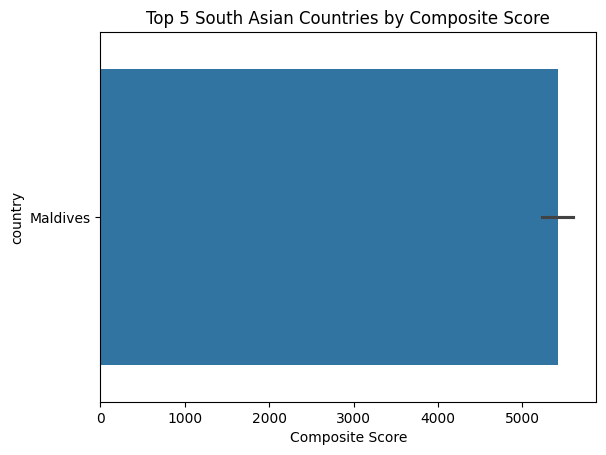

In [53]:
south_asia_df['Composite Score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)

top_5 = south_asia_df.sort_values(
    by='Composite Score',
    ascending=False
).head(5)

sns.barplot(data=top_5, x='Composite Score', y='country')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.show()


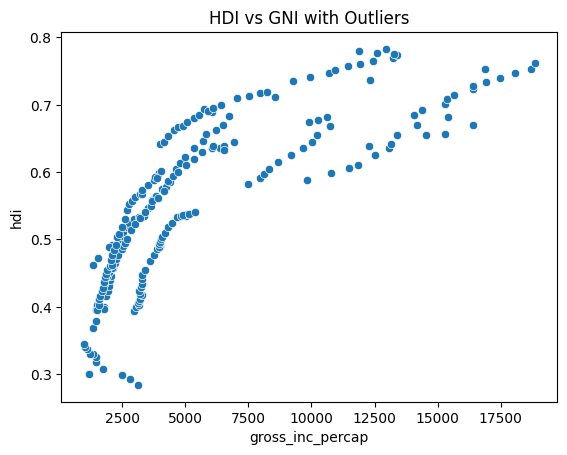

In [28]:
Q1 = south_asia_df['hdi'].quantile(0.25)
Q3 = south_asia_df['hdi'].quantile(0.75)
IQR = Q3 - Q1

outliers = south_asia_df[
    (south_asia_df['hdi'] < Q1 - 1.5 * IQR) |
    (south_asia_df['hdi'] > Q3 + 1.5 * IQR)
]

sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap',
    y='hdi'
)
sns.scatterplot(
    data=outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red'
)
plt.title("HDI vs GNI with Outliers")
plt.show()


In [55]:
corr_life = south_asia_df['life_expectancy'].corr(south_asia_df['hdi'])
corr_gender = south_asia_df['gender_development'].corr(south_asia_df['hdi'])

corr_life, corr_gender


(np.float64(0.9587610559043978), np.float64(0.865621005012754))

In [30]:
south_asia_df['GNI_HDI_Gap'] = (
    south_asia_df['gross_inc_percap'] - south_asia_df['hdi']
)

gap_sorted = south_asia_df.sort_values(by='GNI_HDI_Gap')

gap_sorted.head(3)
gap_sorted.tail(3)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite Score,GNI_HDI_Gap
3500,3501,MDV,Maldives,1992,NaN,65.007,0.239136,NaN,NaN,65.836,...,23.125944,24.336155,6.25,93.75,23.38,75.97,0.965267,NaN,2640.482995,NaN
3501,3502,MDV,Maldives,1993,NaN,65.739,0.245845,NaN,NaN,66.648,...,22.629765,24.828055,6.25,93.75,24.96,75.32,0.804816,NaN,2726.101758,NaN
3502,3503,MDV,Maldives,1994,NaN,66.511,0.252201,NaN,NaN,67.441,...,22.133586,24.148560,6.25,93.75,26.55,74.67,0.784533,NaN,2833.266093,NaN


In [31]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


In [32]:
south_asia_2020_22 = df_2020_22[df_2020_22['country'].isin(south_asia)].copy()
middle_east_2020_22 = df_2020_22[df_2020_22['country'].isin(middle_east)].copy()


In [33]:
south_asia_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


In [34]:
sa_stats = south_asia_2020_22['hdi'].agg(['mean', 'std'])
me_stats = middle_east_2020_22['hdi'].agg(['mean', 'std'])

sa_stats, me_stats


(mean    0.639583
 std     0.098273
 Name: hdi, dtype: float64,
 mean    0.788909
 std     0.141295
 Name: hdi, dtype: float64)

In [35]:
sa_country_avg = (
    south_asia_2020_22
    .groupby('country')['hdi']
    .mean()
    .sort_values()
)

me_country_avg = (
    middle_east_2020_22
    .groupby('country')['hdi']
    .mean()
    .sort_values()
)


In [36]:
sa_top_bottom = pd.concat([sa_country_avg.head(3), sa_country_avg.tail(3)])
me_top_bottom = pd.concat([me_country_avg.head(3), me_country_avg.tail(3)])


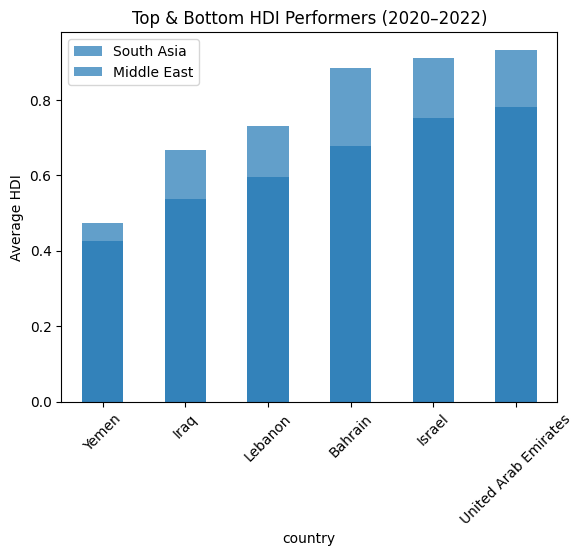

In [37]:
fig, ax = plt.subplots()

sa_top_bottom.plot(kind='bar', ax=ax, alpha=0.7, label='South Asia')
me_top_bottom.plot(kind='bar', ax=ax, alpha=0.7, label='Middle East')

ax.set_title("Top & Bottom HDI Performers (2020–2022)")
ax.set_ylabel("Average HDI")
ax.legend()
plt.xticks(rotation=45)
plt.show()


In [38]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_metrics_avg = south_asia_2020_22[metrics].mean()
me_metrics_avg = middle_east_2020_22[metrics].mean()

comparison_df = pd.DataFrame({
    'South Asia': sa_metrics_avg,
    'Middle East': me_metrics_avg
})

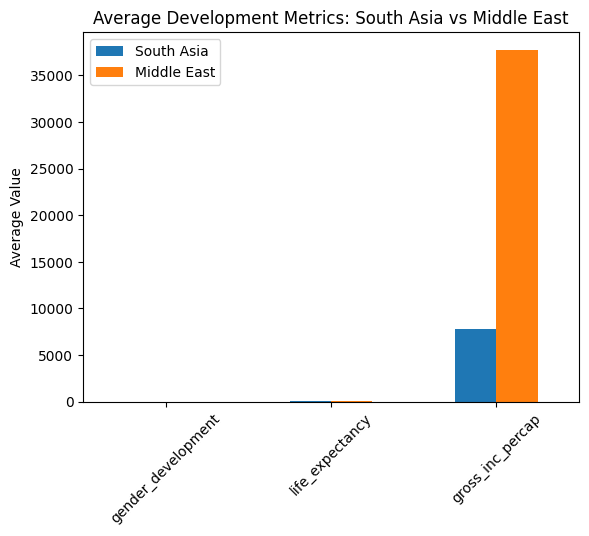

In [39]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_metrics_avg = south_asia_2020_22[metrics].mean()
me_metrics_avg = middle_east_2020_22[metrics].mean()

comparison_df = pd.DataFrame({
    'South Asia': sa_metrics_avg,
    'Middle East': me_metrics_avg
})

comparison_df.plot(kind='bar')
plt.title("Average Development Metrics: South Asia vs Middle East")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

In [40]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_metrics_avg = south_asia_2020_22[metrics].mean()
me_metrics_avg = middle_east_2020_22[metrics].mean()

comparison_df = pd.DataFrame({
    'South Asia': sa_metrics_avg,
    'Middle East': me_metrics_avg
})

In [41]:
sa_range = south_asia_2020_22['hdi'].max() - south_asia_2020_22['hdi'].min()
me_range = middle_east_2020_22['hdi'].max() - middle_east_2020_22['hdi'].min()

sa_cv = south_asia_2020_22['hdi'].std() / south_asia_2020_22['hdi'].mean()
me_cv = middle_east_2020_22['hdi'].std() / middle_east_2020_22['hdi'].mean()

sa_range, me_range, sa_cv, me_cv


(0.321,
 0.5130000000000001,
 np.float64(0.1536520924690084),
 np.float64(0.17910145193048382))

In [42]:
south_asia_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr()

,hdi,gender_development,life_expectancy
hdi,1.000000,0.874218,0.938764
gender_development,0.874218,1.000000,0.853780
life_expectancy,0.938764,0.853780,1.000000


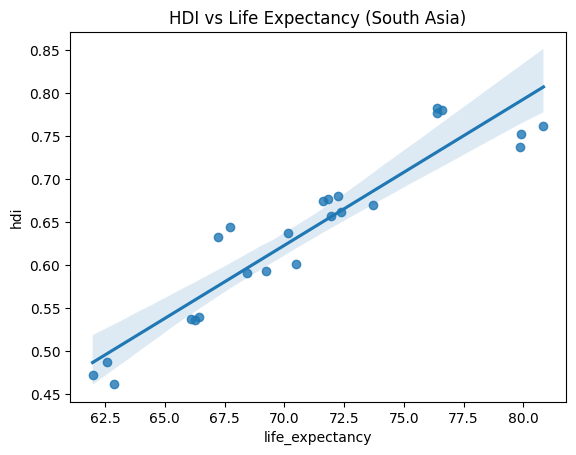

In [43]:
sns.regplot(
    data=south_asia_2020_22,
    x='life_expectancy',
    y='hdi'
)
plt.title("HDI vs Life Expectancy (South Asia)")
plt.show()

In [44]:
middle_east_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr()

,hdi,gender_development,life_expectancy
hdi,1.000000,0.935670,0.933123
gender_development,0.935670,1.000000,0.912836
life_expectancy,0.933123,0.912836,1.000000


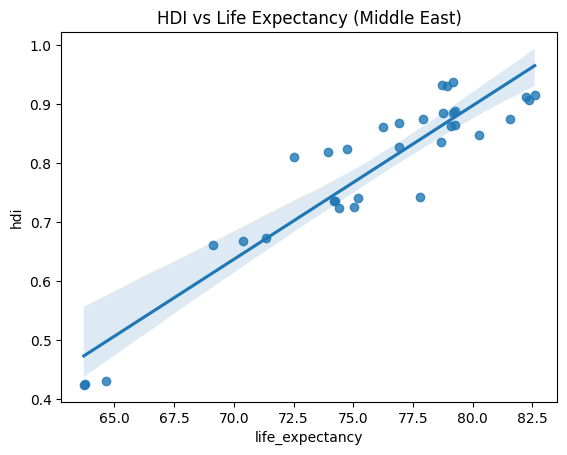

In [45]:
sns.regplot(
    data=middle_east_2020_22,
    x='life_expectancy',
    y='hdi'
)
plt.title("HDI vs Life Expectancy (Middle East)")
plt.show()

In [46]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[
        (df[column] < Q1 - 1.5 * IQR) |
        (df[column] > Q3 + 1.5 * IQR)
    ]


In [47]:
sa_outliers = find_outliers(south_asia_2020_22, 'hdi')
me_outliers = find_outliers(middle_east_2020_22, 'hdi')


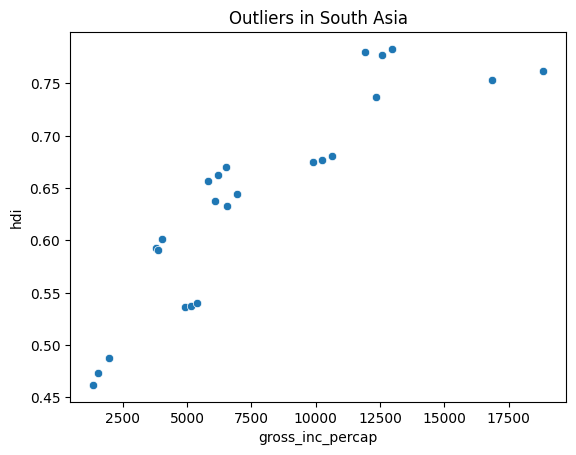

In [48]:
sns.scatterplot(
    data=south_asia_2020_22,
    x='gross_inc_percap',
    y='hdi'
)
sns.scatterplot(
    data=sa_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red'
)
plt.title("Outliers in South Asia")
plt.show()

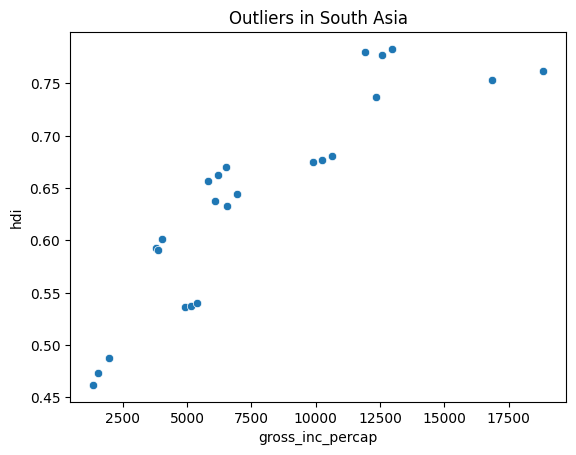

In [49]:
sns.scatterplot(
    data=south_asia_2020_22,
    x='gross_inc_percap',
    y='hdi'
)
sns.scatterplot(
    data=sa_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red'
)
plt.title("Outliers in South Asia")
plt.show()

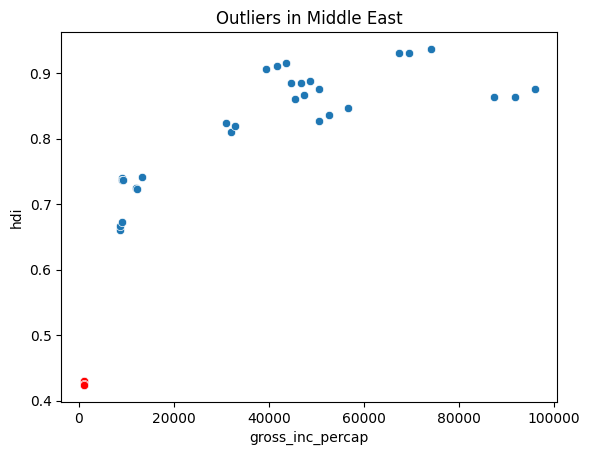

In [50]:
sns.scatterplot(
    data=middle_east_2020_22,
    x='gross_inc_percap',
    y='hdi'
)
sns.scatterplot(
    data=me_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red'
)
plt.title("Outliers in Middle East")
plt.show()

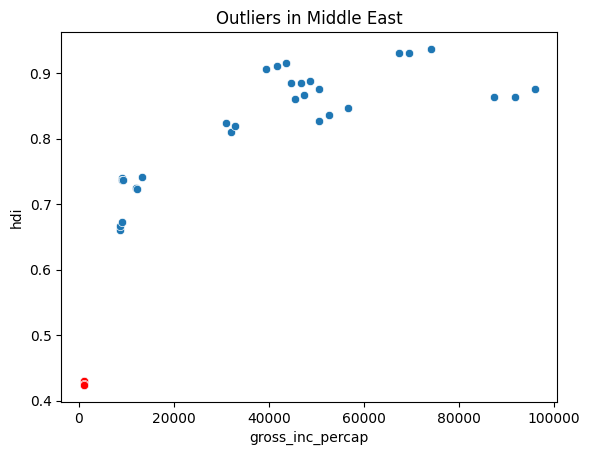

In [51]:
sns.scatterplot(
    data=middle_east_2020_22,
    x='gross_inc_percap',
    y='hdi'
)
sns.scatterplot(
    data=me_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red'
)
plt.title("Outliers in Middle East")
plt.show()